# Import Necessary Packages

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

# Set Psudeorandom Seed

In [2]:
#Set Psudeorandom Seed
seed = 42

# File Loop for Alternative Specification plus Conflict Type

In [3]:
# Load dataset
files = []

files.append(('State Based','C:/Users/Brandon/Documents/thesis/data/con_1.xlsx'))
files.append(('Non State','C:/Users/Brandon/Documents/thesis/data/con_2.xlsx'))
files.append(('One Sided','C:/Users/Brandon/Documents/thesis/data/con_3.xlsx'))

models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RTREE', RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)))
models.append(('XTREE', xgb.XGBRFClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Algo for Alternative plus Conflict Type & PCA

In [4]:
for name, file in files:
    print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    #print('dataframe created')
    
    algo = []
    recall = []
    f1 = []
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = 2) 
    X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    for algo, model in models:
        model.fit(X_train_smote, Y_train_smote)
        predictions = model.predict(X_validation)
        recall.append(round(recall_score(Y_validation, predictions),2))
        f1.append(round(f1_score(Y_validation, predictions),2))
        print('%s: %f / %f / %f' % (algo, round(accuracy_score(Y_validation, predictions),2),round(recall_score(Y_validation, predictions),2), round(f1_score(Y_validation, predictions),2)))
    print('')
    print('')

Fitting for State Based


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.900000 / 0.900000 / 0.760000
LDA: 0.900000 / 0.870000 / 0.750000
KNN: 0.920000 / 0.910000 / 0.790000
CART: 0.920000 / 0.800000 / 0.780000
RTREE: 0.900000 / 0.930000 / 0.770000
XTREE: 0.910000 / 0.890000 / 0.770000
NB: 0.800000 / 0.920000 / 0.610000
SVM: 0.920000 / 0.910000 / 0.800000


Fitting for Non State


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.880000 / 0.920000 / 0.620000
LDA: 0.860000 / 0.880000 / 0.570000
KNN: 0.920000 / 0.870000 / 0.700000
CART: 0.930000 / 0.690000 / 0.660000
RTREE: 0.860000 / 0.900000 / 0.570000
XTREE: 0.870000 / 0.920000 / 0.600000
NB: 0.800000 / 0.920000 / 0.490000
SVM: 0.920000 / 0.920000 / 0.710000


Fitting for One Sided


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.890000 / 0.870000 / 0.720000
LDA: 0.870000 / 0.830000 / 0.690000
KNN: 0.890000 / 0.880000 / 0.720000
CART: 0.900000 / 0.740000 / 0.710000
RTREE: 0.870000 / 0.890000 / 0.700000
XTREE: 0.880000 / 0.850000 / 0.700000
NB: 0.830000 / 0.850000 / 0.630000
SVM: 0.900000 / 0.880000 / 0.750000




Fitting for State Based


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.900000 / 0.900000 / 0.760000
LDA: 0.900000 / 0.870000 / 0.750000
KNN: 0.920000 / 0.910000 / 0.790000
CART: 0.920000 / 0.810000 / 0.780000
RTREE: 0.900000 / 0.930000 / 0.770000
XTREE: 0.910000 / 0.890000 / 0.770000
NB: 0.800000 / 0.920000 / 0.610000
SVM: 0.920000 / 0.910000 / 0.800000


Fitting for Non State


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.880000 / 0.920000 / 0.620000
LDA: 0.860000 / 0.880000 / 0.570000
KNN: 0.920000 / 0.870000 / 0.700000
CART: 0.930000 / 0.690000 / 0.660000
RTREE: 0.860000 / 0.900000 / 0.570000
XTREE: 0.870000 / 0.920000 / 0.600000
NB: 0.800000 / 0.920000 / 0.490000
SVM: 0.920000 / 0.920000 / 0.710000


Fitting for One Sided


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.890000 / 0.870000 / 0.720000
LDA: 0.870000 / 0.830000 / 0.690000
KNN: 0.890000 / 0.880000 / 0.720000
CART: 0.910000 / 0.770000 / 0.730000
RTREE: 0.870000 / 0.890000 / 0.700000
XTREE: 0.880000 / 0.850000 / 0.700000
NB: 0.830000 / 0.850000 / 0.630000
SVM: 0.900000 / 0.880000 / 0.750000




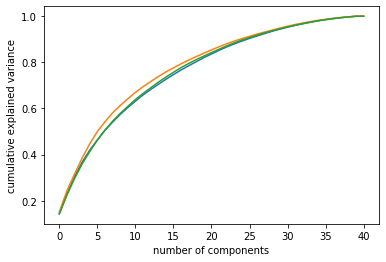

In [5]:
for name, file in files:
    print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    #print('dataframe created')
    
    algo = []
    recall = []
    f1 = []
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = 2) 
    X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    pca = PCA().fit(X_train_smote)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train_smote)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train_pca = pca.fit_transform(X_train_smote)
    X_validation_pca = pca.transform(X_validation)
    
    for algo, model in models:
        model.fit(X_train_smote, Y_train_smote)
        predictions = model.predict(X_validation)
        recall.append(round(recall_score(Y_validation, predictions),2))
        f1.append(round(f1_score(Y_validation, predictions),2))
        print('%s: %f / %f / %f' % (algo, round(accuracy_score(Y_validation, predictions),2),round(recall_score(Y_validation, predictions),2), round(f1_score(Y_validation, predictions),2)))    
    print('')
    print('')

# Algo for Alternative plus Conflict Type plus Y/R/C Dummies & PCA

In [6]:
dum = pd.read_excel ('C:/Users/Brandon/Documents/thesis/data/1y_offset.xlsx',index_col=0,na_values=['..'])

year_dummies = pd.get_dummies(dum.year, prefix='year').iloc[:,1:]
region_dummies = pd.get_dummies(dum.region, prefix='region').iloc[:,1:]
country_dummies = pd.get_dummies(dum.ccode, prefix='country: ').iloc[:,1:]

In [7]:
for name, file in files:
    print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    pd.concat([df, year_dummies, region_dummies, country_dummies])
    
    algo = []
    recall = []
    f1 = []
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = 2) 
    X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')
    
    for algo, model in models:
        model.fit(X_train_smote, Y_train_smote)
        predictions = model.predict(X_validation)
        recall.append(round(recall_score(Y_validation, predictions),2))
        f1.append(round(f1_score(Y_validation, predictions),2))
        print('%s: %f / %f / %f' % (algo, round(accuracy_score(Y_validation, predictions),2),round(recall_score(Y_validation, predictions),2), round(f1_score(Y_validation, predictions),2)))
    print('')
    print('')

Fitting for State Based


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.900000 / 0.900000 / 0.760000
LDA: 0.900000 / 0.870000 / 0.750000
KNN: 0.920000 / 0.910000 / 0.790000
CART: 0.920000 / 0.810000 / 0.790000
RTREE: 0.900000 / 0.930000 / 0.770000
XTREE: 0.910000 / 0.890000 / 0.770000
NB: 0.800000 / 0.920000 / 0.610000
SVM: 0.920000 / 0.910000 / 0.800000


Fitting for Non State


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.880000 / 0.920000 / 0.620000
LDA: 0.860000 / 0.880000 / 0.570000
KNN: 0.920000 / 0.870000 / 0.700000
CART: 0.930000 / 0.690000 / 0.670000
RTREE: 0.860000 / 0.900000 / 0.570000
XTREE: 0.870000 / 0.920000 / 0.600000
NB: 0.800000 / 0.920000 / 0.490000
SVM: 0.920000 / 0.920000 / 0.710000


Fitting for One Sided


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.890000 / 0.870000 / 0.720000
LDA: 0.870000 / 0.830000 / 0.690000
KNN: 0.890000 / 0.880000 / 0.720000
CART: 0.900000 / 0.760000 / 0.730000
RTREE: 0.870000 / 0.890000 / 0.700000
XTREE: 0.880000 / 0.850000 / 0.700000
NB: 0.830000 / 0.850000 / 0.630000
SVM: 0.900000 / 0.880000 / 0.750000




Fitting for State Based


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.900000 / 0.900000 / 0.760000
LDA: 0.900000 / 0.870000 / 0.750000
KNN: 0.920000 / 0.910000 / 0.790000
CART: 0.920000 / 0.800000 / 0.780000
RTREE: 0.900000 / 0.930000 / 0.770000
XTREE: 0.910000 / 0.890000 / 0.770000
NB: 0.800000 / 0.920000 / 0.610000
SVM: 0.920000 / 0.910000 / 0.800000


Fitting for Non State


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.880000 / 0.920000 / 0.620000
LDA: 0.860000 / 0.880000 / 0.570000
KNN: 0.920000 / 0.870000 / 0.700000
CART: 0.930000 / 0.700000 / 0.670000
RTREE: 0.860000 / 0.900000 / 0.570000
XTREE: 0.870000 / 0.920000 / 0.600000
NB: 0.800000 / 0.920000 / 0.490000
SVM: 0.920000 / 0.920000 / 0.710000


Fitting for One Sided


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LR: 0.890000 / 0.870000 / 0.720000
LDA: 0.870000 / 0.830000 / 0.690000
KNN: 0.890000 / 0.880000 / 0.720000
CART: 0.910000 / 0.760000 / 0.730000
RTREE: 0.870000 / 0.890000 / 0.700000
XTREE: 0.880000 / 0.850000 / 0.700000
NB: 0.830000 / 0.850000 / 0.630000
SVM: 0.900000 / 0.880000 / 0.750000




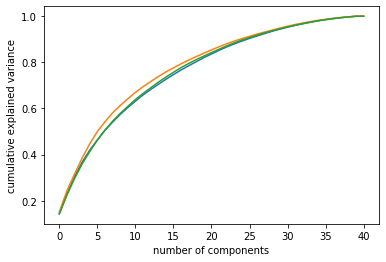

In [8]:
for name, file in files:
    print('Fitting for '+name)
    df = pd.read_excel (file,index_col=0,na_values=['..'])
    pd.concat([df, year_dummies, region_dummies, country_dummies])
    
    algo = []
    recall = []
    f1 = []
    
    #Create testing and training sets
    array = df.values

    #Create X array
    X= array[:,4:]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    #Create Y array
    Y= array[:,3]
    Y=Y.astype('int')

    #Training/Test Split
    X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
    #print('Train/Test Split Complete')
    
    #Impliment SMOTE
    sm = SMOTE(random_state = 2) 
    X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)
    #print('oversampling complete')

    pca = PCA().fit(X_train_smote)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    
    pca = PCA(.8)
    principalComponents = pca.fit_transform(X_train_smote)
    #print('Using '+pca.n_components_+' PCA variables.')
    
    X_train_pca = pca.fit_transform(X_train_smote)
    X_validation_pca = pca.transform(X_validation)
    
    for algo, model in models:
        model.fit(X_train_smote, Y_train_smote)
        predictions = model.predict(X_validation)
        recall.append(round(recall_score(Y_validation, predictions),2))
        f1.append(round(f1_score(Y_validation, predictions),2))
        print('%s: %f / %f / %f' % (algo, round(accuracy_score(Y_validation, predictions),2),round(recall_score(Y_validation, predictions),2), round(f1_score(Y_validation, predictions),2)))    
    print('')
    print('')